In [1]:
from DataUtils import *
import pandas as pd
import matplotlib.pyplot as plt

labels = ['text','isFake']

# Reading data set
    # Two Datasets
        1. Kaggle
        2. Reserach Articles News
    # Drop irrelevant columns

In [2]:
kaggle_data = getKaggleNewsDataSet()
print(kaggle_data.head())

research_data = getReserachArticleNewsDataSet()
research_data.head()

                                               title  \
0  WHEN HUMA MET HILLARY: “Oh my God, she’s so be...   
1  FORMER DNC AIDES In Hot Water Over Possible Mo...   
2  Exclusive: Koran, boots and scarves all that r...   
3  HYSTERICAL! TODDLERS HIJACK LIVE INTERVIEW Wit...   
4   The Amazing White Right-Wing Entitlement Of T...   

                                                text    subject  \
0  Apparently Hillary s secret emails may contain...  left-news   
1  The plot thickens with the saga of the IT work...   politics   
2  MARAWI CITY, Philippines (Reuters) - Prayer ma...  worldnews   
3                                                      politics   
4  As of this writing, there are 4 heavily armed ...       News   

                date  isFake  
0        Apr 6, 2016       1  
1       Dec 19, 2017       1  
2  October 27, 2017        0  
3       Mar 10, 2017       1  
4  February 11, 2016       1  


,text,isFake
0,Share Tweet Your Name (re...,1
1,Share Tweet Your Name (re...,1
2,Russia has decided to develop a long-term mi...,1
3,What doesn’t kill you will make you stronge...,1
4,President Trump said he never told Michael ...,1


# Visualizing data set

## Kaggle : How many articles per subject?

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


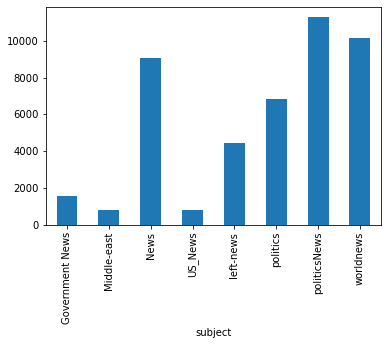

In [3]:
print(kaggle_data.groupby(['subject'])['text'].count())
kaggle_data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

## Kaggle : How many fake and real articles?

isFake
0    21417
1    23481
Name: text, dtype: int64


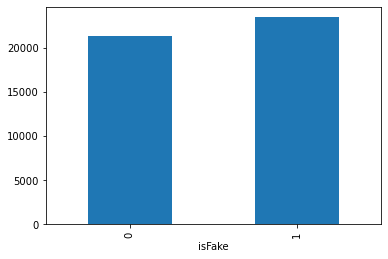

In [4]:
print(kaggle_data.groupby(['isFake'])['text'].count())
kaggle_data.groupby(['isFake'])['text'].count().plot(kind="bar")
plt.show()

## Research Article News : How many fake and real articles?

isFake
0    80
1    90
Name: text, dtype: int64


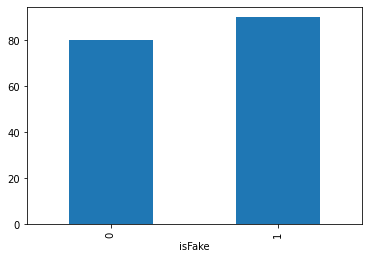

In [5]:
print(research_data.groupby(['isFake'])['text'].count())
research_data.groupby(['isFake'])['text'].count().plot(kind="bar")
plt.show()

## GET TEXT COLUMNS DF

In [6]:
kaggle_fake=kaggle_data[kaggle_data["isFake"]==1]
kaggle_real=kaggle_data[kaggle_data["isFake"]==0]

research_fake=research_data[research_data["isFake"]==1]
research_real=research_data[research_data["isFake"]==0]

## Kaggel : Word Cloud

### Fake

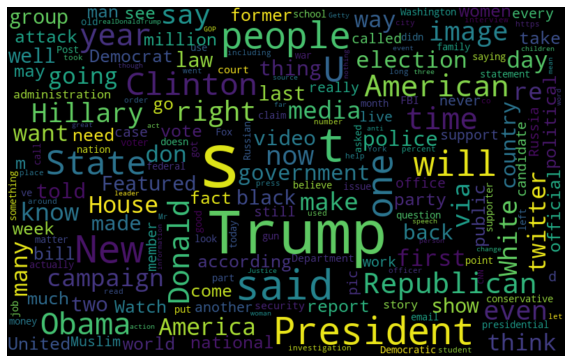

In [7]:
word_cloud(kaggle_fake, "text")

### Real

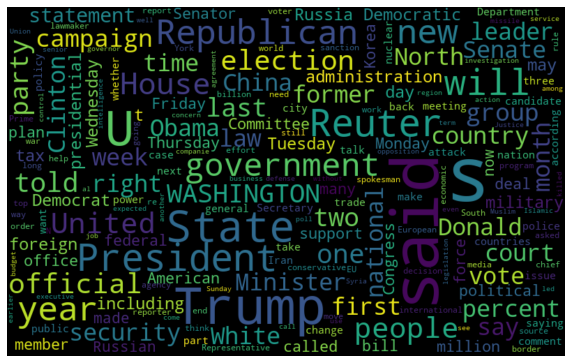

In [8]:
word_cloud(kaggle_real, "text")

## Research News : Word Cloud

### Fake

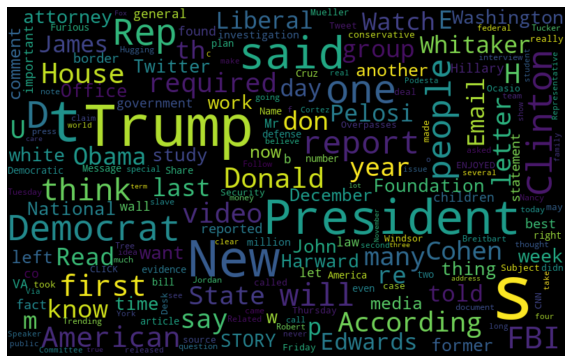

In [9]:
word_cloud(research_fake, "text")

### Real

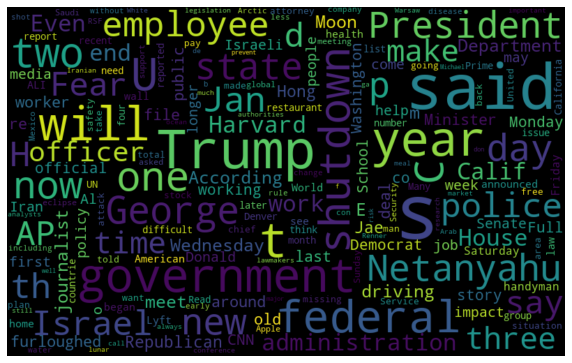

In [10]:
word_cloud(research_real, "text")

## Kaggel Word counts and frequency

### Fake

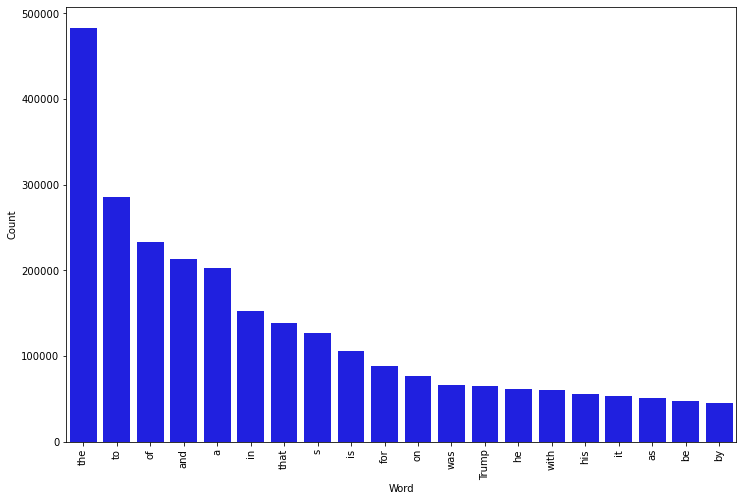

In [11]:
frequency(kaggle_fake, "text", 20)

### Real

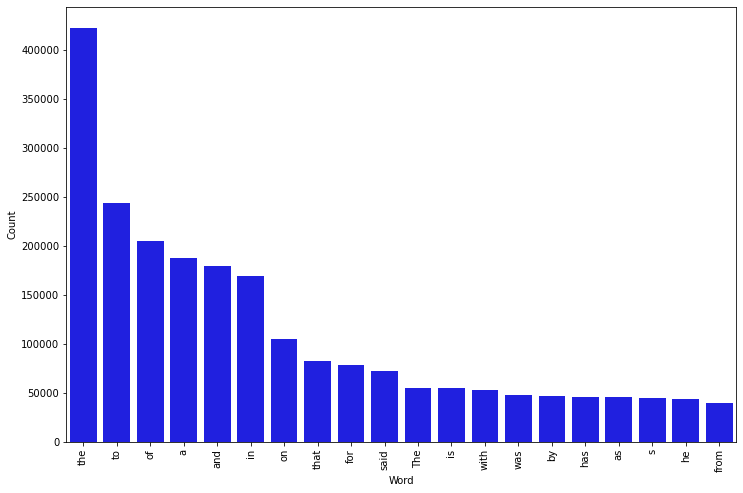

In [12]:
frequency(kaggle_real, "text", 20)

## Research Word counts and frequency

### Fake

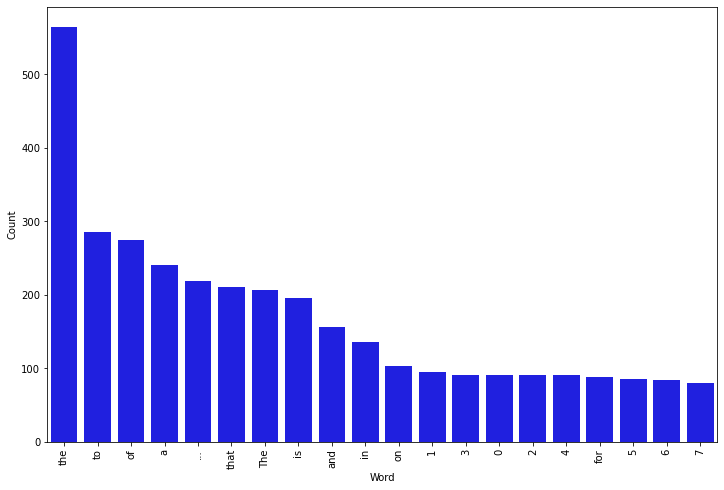

In [13]:
frequency(research_fake, "text", 20)

### Real

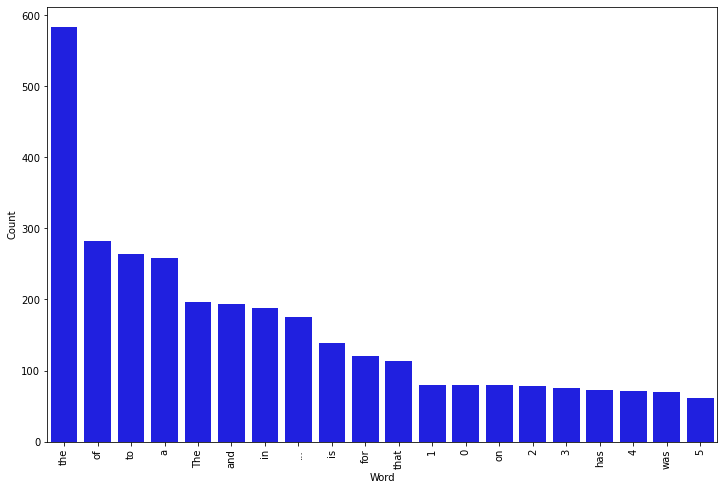

In [14]:
frequency(research_real, "text", 20)

## Data Cleaning

### Kaggle - Drop irrelevant columns 

In [15]:
kaggle_data.drop(['title', 'subject', 'date'],axis=1,inplace=True)

### Remove Stopwords and Punctuations

In [16]:

# def clean_data1(df, columns):
#     for i, col in enumerate(columns):
#         df[col] = df[col].apply(lambda text: clean_text1(text))

# ### Lemmatization OR Stemming
# # Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological 
# # analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary 
# # form of a word, which is known as the lemma.
        
# def clean_text1(text):
#     text = ''.join(char.lower() for char in text if char not in punct)
#     tokens = re.split('\W+', text)
#     text = ' '.join([lm.lemmatize(word) for word in tokens if word not in sw])
#     print(text)
# #     text = [(lm.lemmatize(word) and stemmer.stem(word)) for word in tokens if word not in sw]
#     return text


clean_data(kaggle_data, ["text"])
clean_data(research_data, ["text"])

In [17]:
# train_data, test_data, train_labels, test_labels = train_test_split(research_data['text'].values, (research_data.isFake).values, test_size=0.2, random_state=42, shuffle="false")

# from sklearn.metrics import plot_confusion_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression


# tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tfidf_ngrams = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000, lowercase=False)
    

# # Vectorizing and applying TF-IDF
# pipe = Pipeline([('tfidf', tfidf),
# #                  ('tfidf_ngrams', tfidf_ngrams),
#                  ('model', LogisticRegression())])
# # Fitting the model
# model = pipe.fit(train_data, train_labels)
# # Accuracy
# prediction = model.predict(test_data)
# print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))

# cm = metrics.confusion_matrix(test_labels, prediction)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])



## Combine both dataset

In [18]:
all_data = kaggle_data.append(research_data, ignore_index=True, sort=False)
all_data.head()

,text,isFake
0,apparently hillary secret email may contain in...,1
1,plot thickens saga worker worked democrat like...,1
2,marawi city philippine reuters prayer mat cheq...,0
3,,1
4,writing 4 heavily armed moron still malheur na...,1


### Data visualization after cleanup

isFake
0    21497
1    23571
Name: text, dtype: int64


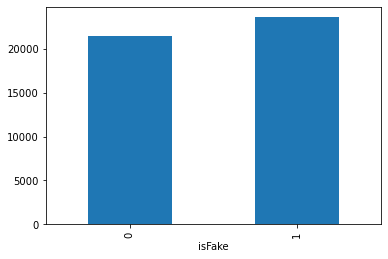

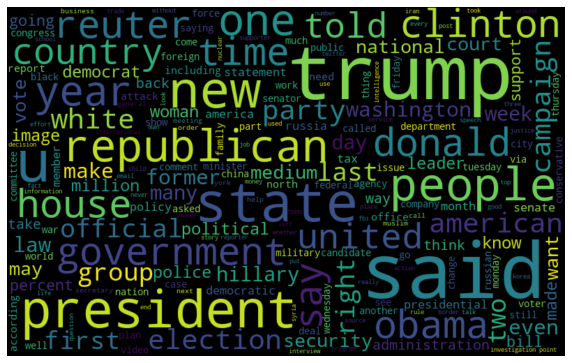

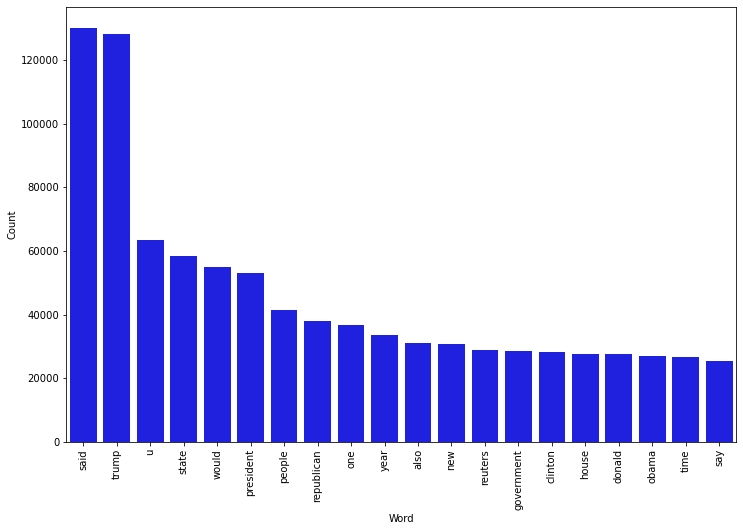

In [19]:
print(all_data.groupby(['isFake'])['text'].count())
all_data.groupby(['isFake'])['text'].count().plot(kind="bar")
plt.show()

word_cloud(all_data, "text")

frequency(all_data, "text", 20)

### Split to train, test

In [20]:
# train_data, test_data, train_labels, test_labels = split_data(kaggle_data, labels)
train_data, test_data, train_labels, test_labels = train_test_split(all_data['text'].values, all_data['isFake'].values, test_size=0.2, random_state=42, shuffle="false")

# print("X_train shape: {}".format(train_data))
# print("X_test shape: {}".format(test_data))
# print("y_train shape: {}".format(train_labels))
# print("y_test shape: {}".format(test_labels))


# Logistic regression:

In [30]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tfidf_ngrams = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
    

# # Vectorizing and applying TF-IDF
# pipe = Pipeline([('tfidf', tfidf),
# #                  ('tfidf_ngrams', tfidf_ngrams),
#                  ('model', LogisticRegression())])

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(train_data, train_labels)
# Accuracy
prediction = model.predict(test_data)
print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))
cm = metrics.confusion_matrix(test_labels, prediction)

plot_confusion_matrix(cm, test_data, test_labels,
                         display_labels=['Fake', 'Real'],
                         cmap=plt.cm.Blues)


accuracy: 98.5%


ValueError: plot_confusion_matrix only supports classifiers

## Decision Tree Classifier:

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(train_data, train_labels)
# Accuracy
prediction = model.predict(test_data)
print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))


cm = metrics.confusion_matrix(test_labels, prediction)
plot_confusion_matrix(cm, test_data, test_labels,
                         display_labels=['Fake', 'Real'],
                         cmap=plt.cm.Blues)


accuracy: 99.43%


ValueError: plot_confusion_matrix only supports classifiers

In [32]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
# Fitting the model
model = pipe.fit(train_data, train_labels)
# Accuracy
prediction = model.predict(test_data)
print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))

cm = metrics.confusion_matrix(test_labels, prediction)
plot_confusion_matrix(cm, test_data, test_labels,
                         display_labels=['Fake', 'Real'],
                         cmap=plt.cm.Blues)

accuracy: 98.24%


ValueError: plot_confusion_matrix only supports classifiers